In [1]:
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline as CS
import matplotlib.pyplot as plt
import numpy as np
import math

### Ejercicio 43
Ingresamos primero la información dada en dos arrays, veamos cuál sería el polinomio interpolante mediante el método de Lagrange:

In [2]:
x=np.array([0,2,3])
y=np.array([7,11,28])
p=np.poly1d(lagrange(x,y))
print(p)

   2
5 x - 8 x + 7


Evaluamos el polinomio anterior en el valor pedido:

In [3]:
p(1)

4.000000000000002

### Ejercicio 44
Ingresamos primero la información dada en dos arrays:

In [4]:
x=np.array([-2,1,4,-1,3,-4,])
y=np.array([-1,2,59,4,24,-53])

Definimos ahora  una función que calcule el polinomio interpolante por el método de Newton y evalúe un punto dado en el polinomio:

In [5]:
def coef(x,y):
    '''Calcula los coeficientes del polinomio de Newton.
    x, y son arrays con los datos dados.'''
    m=len(x)
    a=y.copy()
    for k in range(1,m):
        a[k:m] = (a[k:m]-a[k-1])/(x[k:m]-x[k-1])
    return a

def evalPoly(a,x,p):
    '''Evalua el polinomio de Newton en p, provisto por los coeficientes guardados en a.
    x es el array con los datos.'''
    n=len(x)-1
    pol=a[n]
    for k in range(1,n+1):
        pol=a[n-k]+(p-x[n-k])*pol
    return pol

Calculamos el valor del polinomio interpolante por el método de Newton en el punto dado:

In [6]:
evalPoly(coef(x,y),x,0)

3

### Ejercicio 45
Definimos primero una función que calcule el polinomio interpolante por el método de Neville y evalúe un punto dado en el polinomio:

In [7]:
def neville(x,y,p):
    '''Evalúa el polinomio interpolante en p que pasa a través los puntos (x_i,y_i) por el método de Neville.'''
    m=len(x)
    y=y.copy()
    for k in range(1,m):
        y[0:m-k]=((p-x[k:m])*y[0:m-k]+(x[0:m-k]-p)*y[1:m-k+1])/(x[0:m-k]-x[k:m])
    return y[0]

Ingresamos los datos dados. Note que determinar la raíz de y(x), equivale a calcular x(0) para x(y), así:

In [8]:
x=np.arange(4,3.6,-0.1)
y=np.array([-0.06604,-0.02724,0.01282,0.05383])
neville(y,x,0)

3.831703559723663

### Ejercicio 46
Definimos primero una función que calcule el polinomio interpolante usando una función racional diagonal y evalúe un punto dado en el polinomio:

In [9]:
def rational(x,y,p):
    '''Evalúa el la función racional diagonal interpolante que pasa por (x_i,y_i) en p.'''
    m=len(x)
    r=y.copy()
    rOld=np.zeros(m)
    for k in range(m-1):
        for i in range(m-k-1):
            if abs(p-x[i+k+1])<1.0e-9:
                return y[i+k+1]
            else:
                c1=r[i+1]-r[i]
                c2=r[i+1]-rOld[i+1]
                c3=(p-x[i])/(p-x[i+k+1])
                r[i]=r[i+1]+c1/(c3*(1.0-c1/c2)-1.0)
                rOld[i+1]=r[i+1]
    return r[0]

Calculamos el valor pedido usando la interpolación por función racional:

In [10]:
x=np.array([0,0.6,0.8,0.95])
y=np.array([0,1.3764,3.0777,12.7062])
rational(x,y,0.5)

1.0131205116558464

### Ejemplo 33
Ingresamos los datos de forma que podamos graficar los resultados:

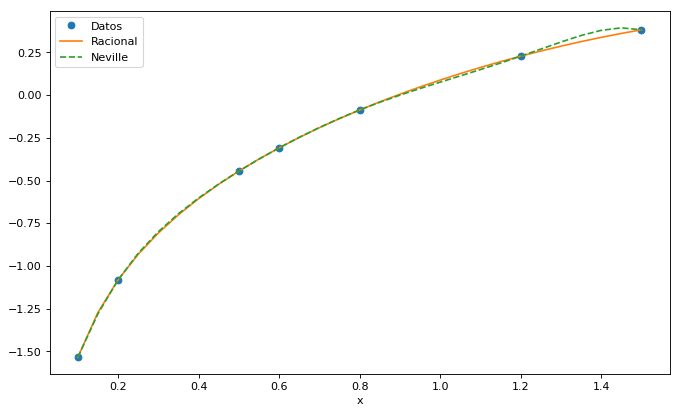

In [11]:
xData = np.array([0.1,0.2,0.5,0.6,0.8,1.2,1.5])
yData = np.array([-1.5342,-1.0811,-0.4445,-0.3085,-0.0868,0.2281,0.3824])
x = np.arange(0.1,1.55,0.05)
n = len(x)
y = np.zeros((n,2))
for i in range(n):
    y[i,0] = rational(xData,yData,x[i])
    y[i,1] = neville(xData,yData,x[i])
plt.figure(figsize=(10,6), dpi=80)
plt.plot(xData,yData,'o',x,y[:,0],'-',x,y[:,1],'--')
plt.xlabel('x')
plt.legend(('Datos','Racional','Neville'),loc = 0)
plt.show()

### Ejercicio 47

Ingresamos los datos y evaluamos el polinomio interpolante en los puntos pedidos:

In [12]:
x=np.array([0.15,2.3,3.15,4.85,6.25,7.95])
y=np.array([4.79867,4.49013,4.2243,3.47313,2.66674,1.51909])
pol=np.poly1d(lagrange(x,y))
a=coef(x,y)
print(" x     yReal   yLagrange  yNewton   yNeville")
print("--------------------------------------------")
for p in np.arange(0.0,8.1,0.5):
    ypol=evalPoly(a,x,p)
    yReal=4.8*math.cos(math.pi*p/20.0)
    print('{:3.1f} {:9.5f} {:9.5f} {:9.5f} {:9.5f}'.format(p,yReal,pol(p),ypol,neville(x,y,p)))

 x     yReal   yLagrange  yNewton   yNeville
--------------------------------------------
0.0   4.80000   4.80003   4.80003   4.80003
0.5   4.78520   4.78518   4.78518   4.78518
1.0   4.74090   4.74088   4.74088   4.74088
1.5   4.66738   4.66736   4.66736   4.66736
2.0   4.56507   4.56507   4.56507   4.56507
2.5   4.43462   4.43462   4.43462   4.43462
3.0   4.27683   4.27683   4.27683   4.27683
3.5   4.09267   4.09267   4.09267   4.09267
4.0   3.88328   3.88327   3.88327   3.88327
4.5   3.64995   3.64994   3.64994   3.64994
5.0   3.39411   3.39411   3.39411   3.39411
5.5   3.11735   3.11735   3.11735   3.11735
6.0   2.82137   2.82137   2.82137   2.82137
6.5   2.50799   2.50799   2.50799   2.50799
7.0   2.17915   2.17915   2.17915   2.17915
7.5   1.83688   1.83687   1.83687   1.83687
8.0   1.48328   1.48329   1.48329   1.48329


Note que los métodos usados tienen una precisión en el resultado de dos cifras decimales en la mayoría de los casos, excepto en aquellos donde coincide con el valor "exacto".

### Ejercicio 48

Ingresamos los datos y usamos la función que calcule la interpolación que deseamos:

In [13]:
x=np.arange(1,6,1)
y=np.array([0,1,0,1,0])
cs=CS(x,y,bc_type='natural')
print(cs(1.5))

0.7678571428571429


Veamos como se ve la interpolación con respecto a los datos:

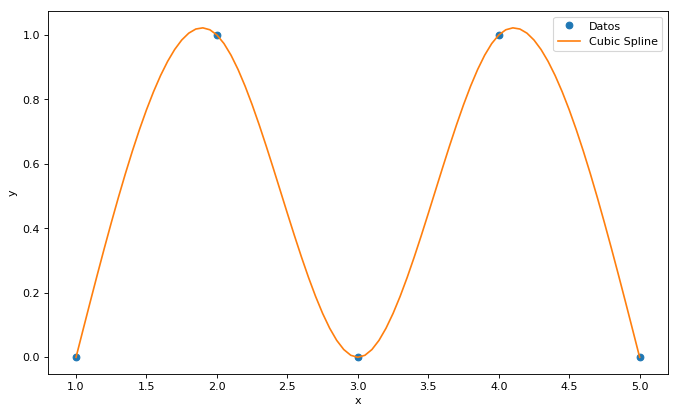

In [14]:
xdat=np.arange(1,5.05,0.05)
ydat=np.zeros(len(xdat))
for i in range(len(xdat)):
    ydat[i]=cs(xdat[i])
plt.figure(figsize=(10,6), dpi=80)
plt.plot(x,y,'o',xdat,ydat,'-')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(('Datos','Cubic Spline'),loc = 0)
plt.show()

### Ejercicio 49

Ingresamos los datos y usamos la función que calcule la interpolación que deseamos:

In [15]:
x=np.arange(0,4,1)
y=np.array([1,1,0.5,0])
cs=CS(x,y,bc_type='clamped')
print(cs(2.6))

0.10879999999999995


Veamos como se ve la interpolación con respecto a los datos:

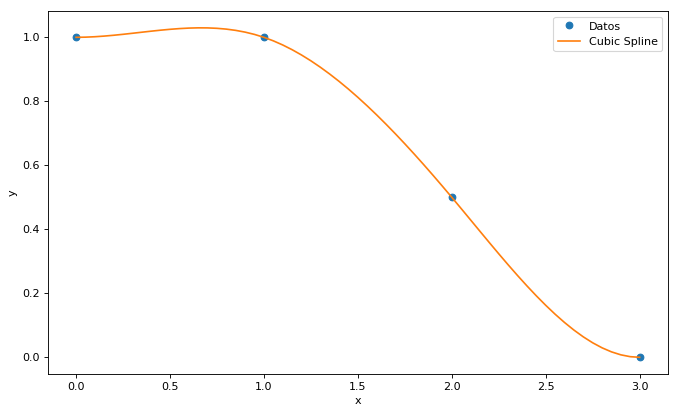

In [16]:
xdat=np.arange(0,3.05,0.05)
ydat=np.zeros(len(xdat))
for i in range(len(xdat)):
    ydat[i]=cs(xdat[i])
plt.figure(figsize=(10,6), dpi=80)
plt.plot(x,y,'o',xdat,ydat,'-')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(('Datos','Cubic Spline'),loc = 0)
plt.show()